### Support Vector Machine (SVM)

In [2]:
# Importando os módulos necessários para o processamento dos dados
import numpy   as np
import pandas  as pd

# Módulos necessários para visualização dos dados
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importando os módulos auxiliares

from sklearn.model_selection import train_test_split # Divisão de conjunto de treinamento e teste
from sklearn.model_selection import cross_validate # Validação cruzada do modelo
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV # Busca pelos melhores hiperparâmetros
from sklearn.externals import joblib # Necessário para salvar os modelos treinados em arquivos externos

# Métricas de avaliação

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import itertools

# Função auxiliar para plotar a matriz de confusão. 
# Retirada de: 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe real')
    plt.xlabel('Classe predita')

# ATENÇÃO!!! Escolher corretamente qual a fração do dataset que está sendo utilizada

fracao_dataset = 0.1

In [3]:
# Importando os arquivos com os datasets pré-processados

path_arquivos = 'Data/'

data_pre_proc_1 = pd.read_csv(path_arquivos+'data-pre-proc-1.csv')
data_pre_proc_2 = pd.read_csv(path_arquivos+'data-pre-proc-2.csv')
data_pre_proc_3 = pd.read_csv(path_arquivos+'data-pre-proc-3.csv')
data_pre_proc_4 = pd.read_csv(path_arquivos+'data-pre-proc-4.csv')

# Separando o target e dividindo os conjuntos de treino e teste para cada dataset

# Dataset 1

target_1 = data_pre_proc_1['earnings']
data_pre_proc_1.drop(columns='earnings', inplace=True)

train_data_1, test_data_1, train_target_1, test_target_1 = train_test_split(
    data_pre_proc_1, target_1, test_size=0.33, random_state=0)

# Dataset 2

target_2 = data_pre_proc_2['earnings']
data_pre_proc_2.drop(columns='earnings', inplace=True)

train_data_2, test_data_2, train_target_2, test_target_2 = train_test_split(
    data_pre_proc_2, target_2, test_size=0.33, random_state=0)
    
# Dataset 3
    
target_3 = data_pre_proc_3['earnings']
data_pre_proc_3.drop(columns='earnings', inplace=True)

train_data_3, test_data_3, train_target_3, test_target_3 = train_test_split(
    data_pre_proc_3, target_3, test_size=0.33, random_state=0)
    
# Dataset 4    

target_4 = data_pre_proc_4['earnings']
data_pre_proc_4.drop(columns='earnings', inplace=True)

train_data_4, test_data_4, train_target_4, test_target_4 = train_test_split(
    data_pre_proc_4, target_4, test_size=0.33, random_state=0)

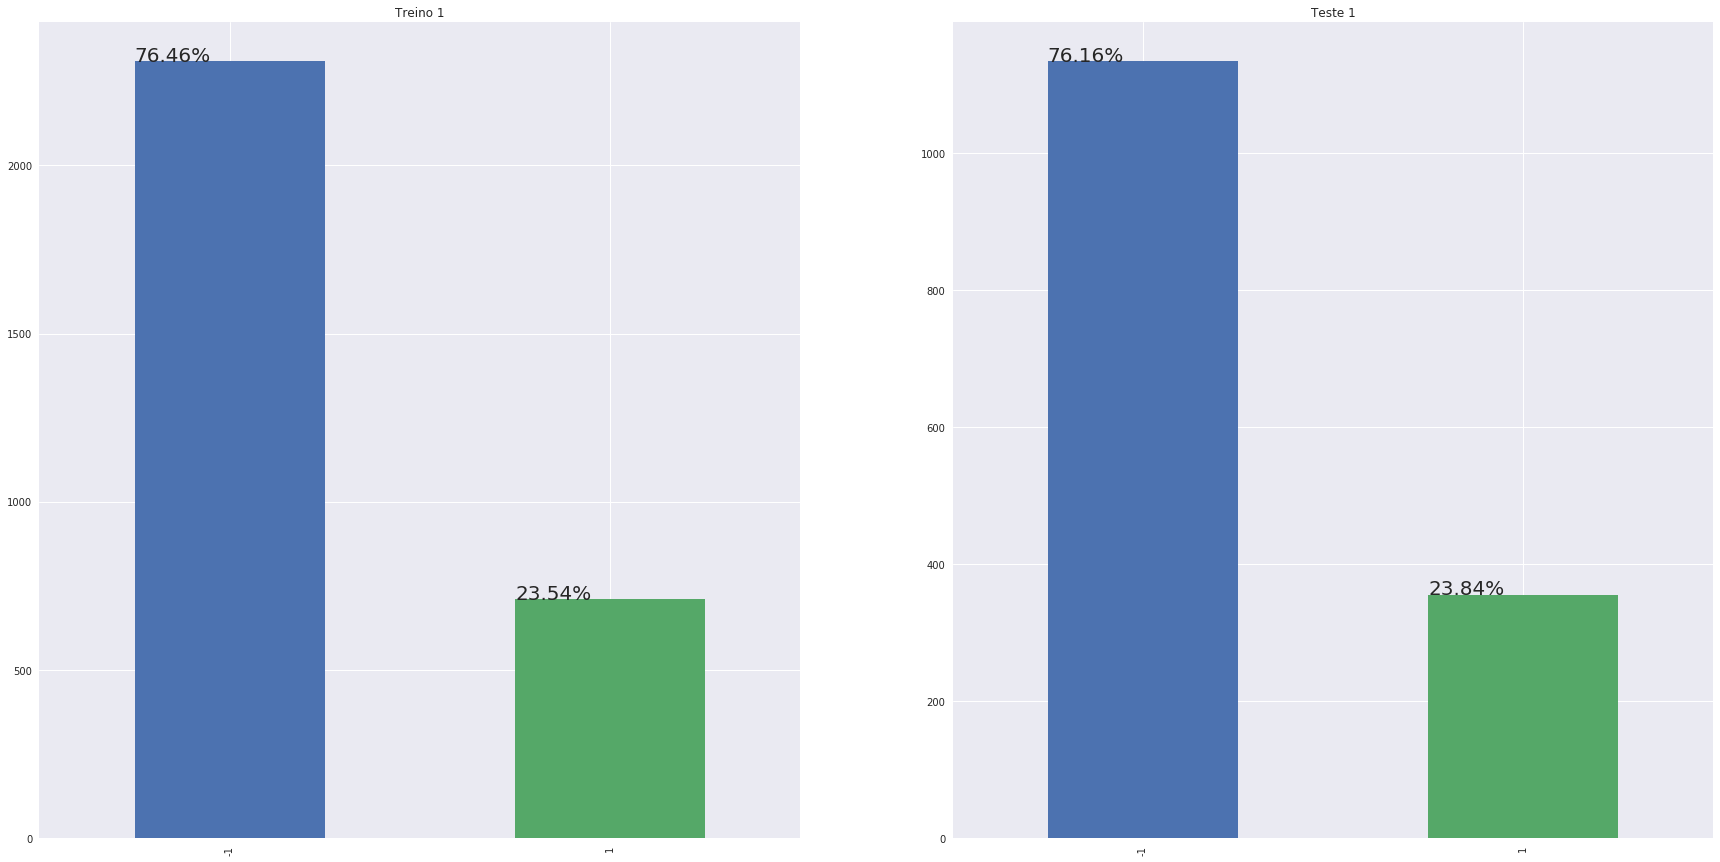

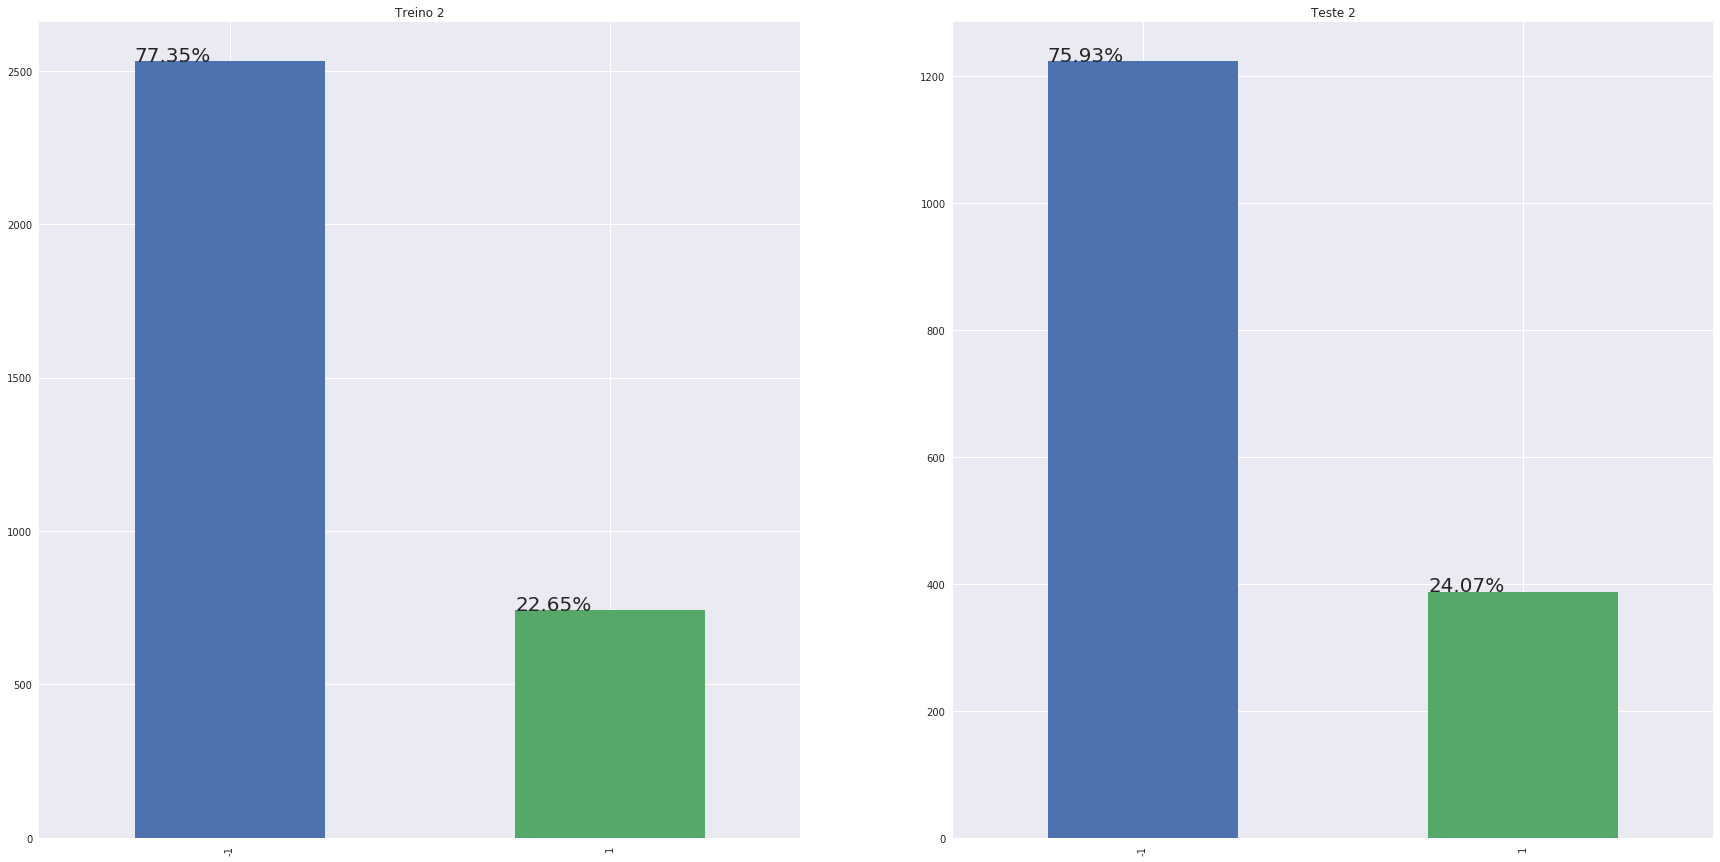

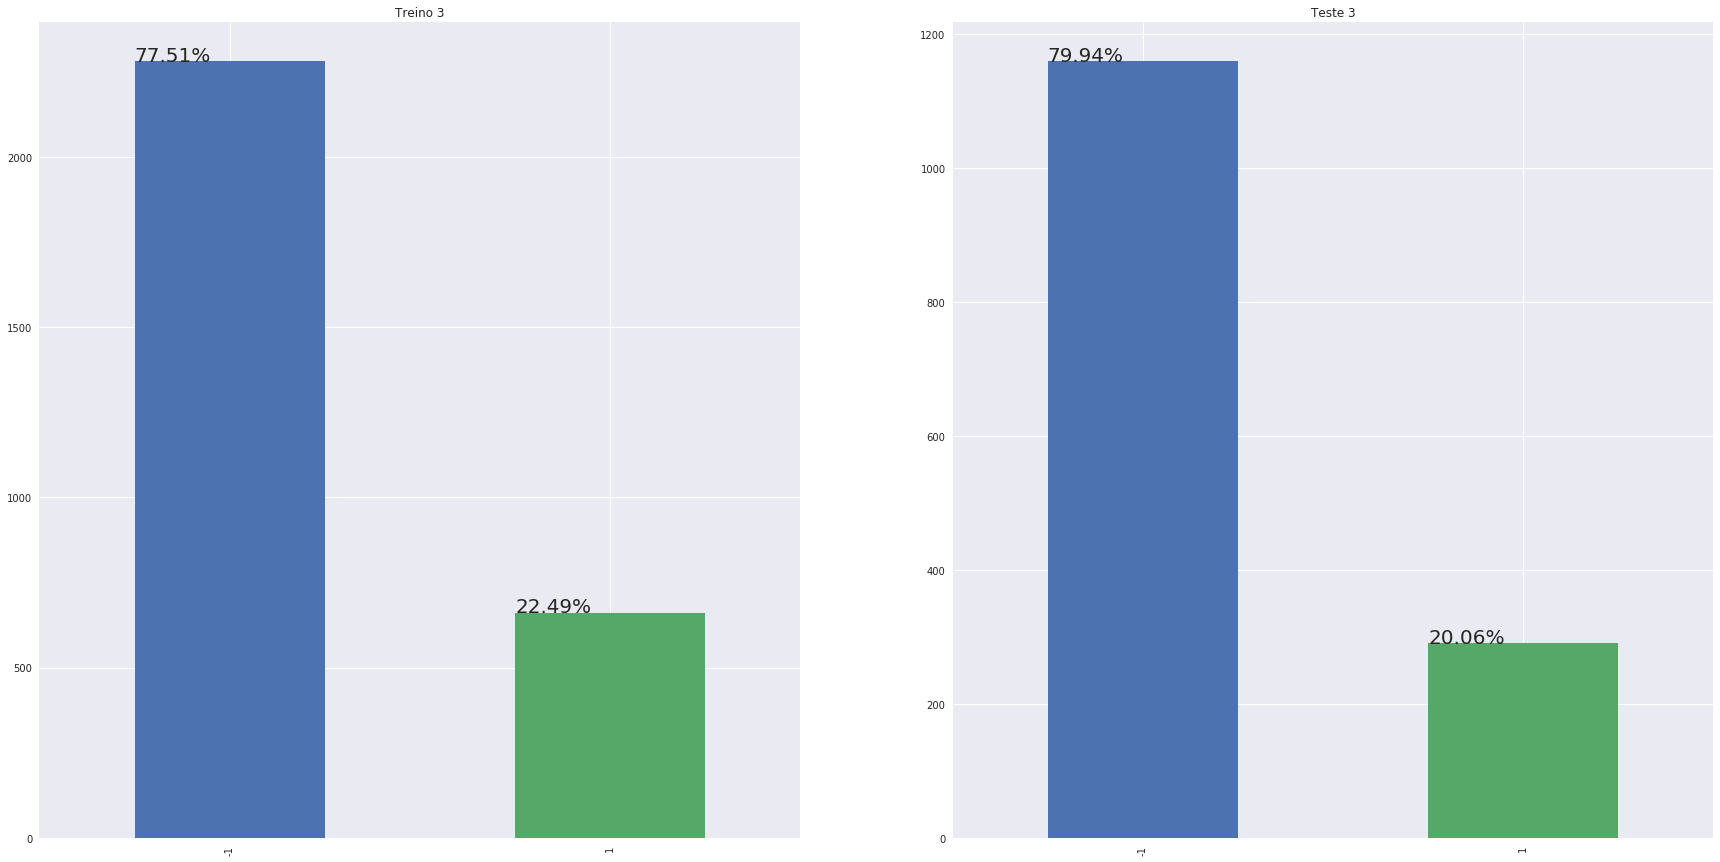

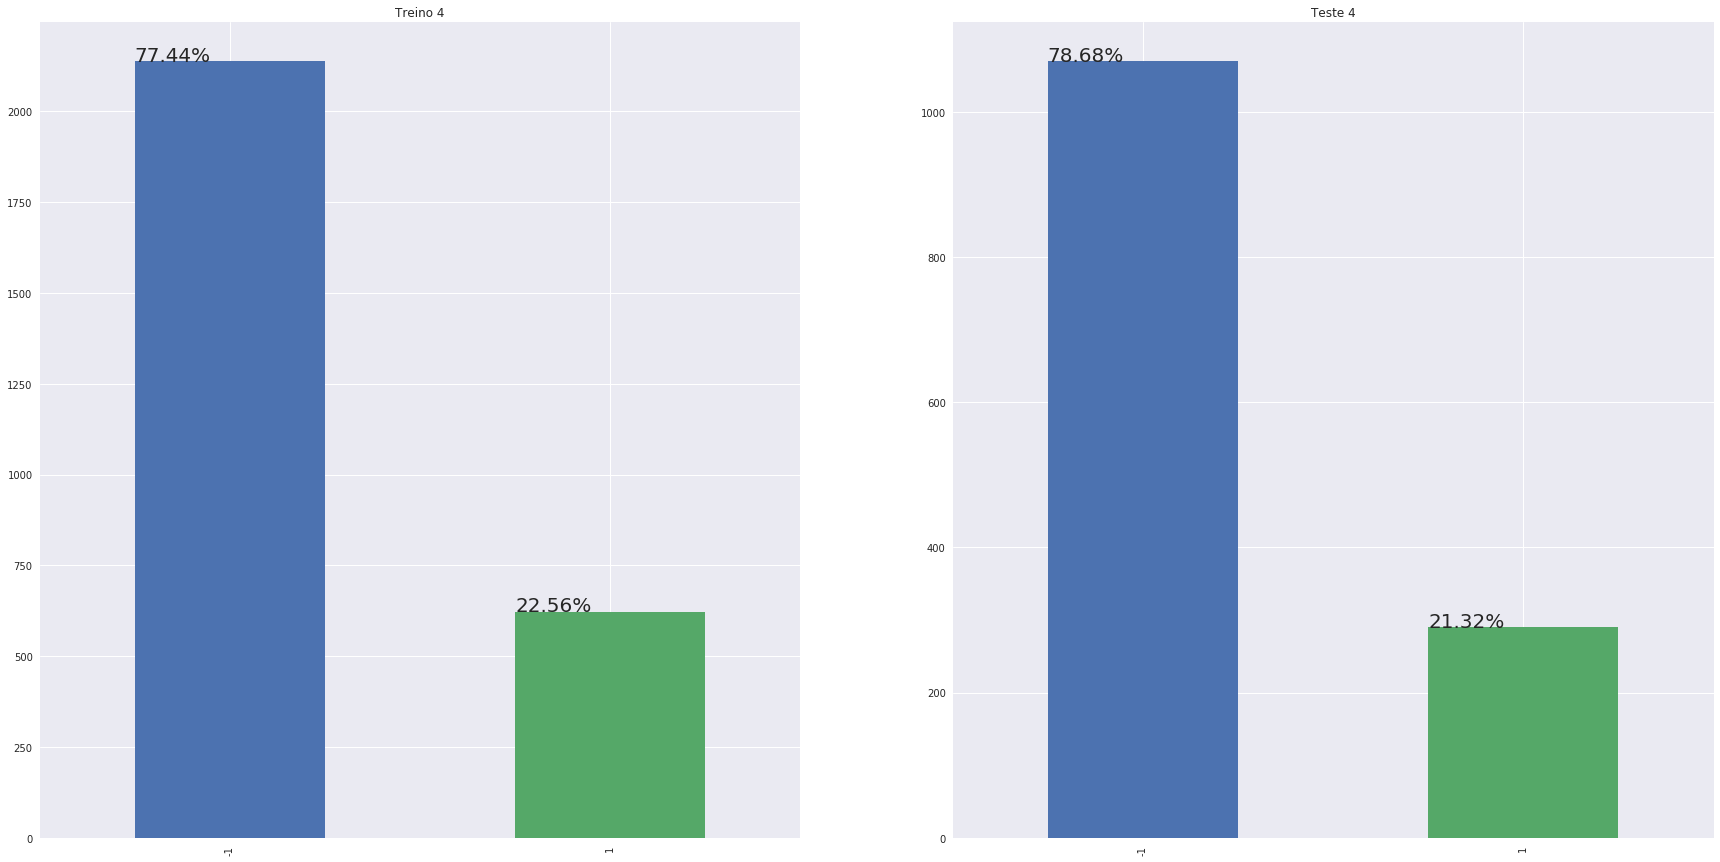

In [4]:
# Checando a distribuição dos targets em cada conjunto (treino e teste) de cada abordagem

sns.set(style='darkgrid')
temp_train = [train_target_1, train_target_2, train_target_3, train_target_4]
temp_test = [test_target_1, test_target_2, test_target_3, test_target_4]

for i in range(4):
    
    fig = plt.figure(figsize=(30,15))

    plt.subplot(121)
    ax = temp_train[i].value_counts().plot.bar()
    for patch in ax.patches:
#         ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=20)
        ax.text(patch.get_x(), patch.get_height(), "{:.2f}%".format((int(patch.get_height())/temp_train[i].shape[0]*100)),fontsize=20)
    plt.title('Treino ' + str(i+1))
#     plt.show()

#     fig = plt.figure(figsize=(30,15))
    
    plt.subplot(122)
    ax = temp_test[i].value_counts().plot.bar()
    for patch in ax.patches:
#         ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=20)
        ax.text(patch.get_x(), patch.get_height(), "{:.2f}%".format((int(patch.get_height())/temp_test[i].shape[0]*100)),fontsize=20)
    plt.title('Teste ' + str(i+1))
#     plt.show()

In [33]:
# Importando módulos do SVM

from sklearn.svm import LinearSVC # SVM com kernel linear
from sklearn.svm import SVC # SVM com kernel não-linear

# Definindo os parâmetros do modelo e possíveis valores

param_grid_linear = {'C': np.logspace(start=0,stop=14,num=15,base=2),
                     'loss': ['hinge', 'squared_hinge']}

param_grid_rbf = [{'kernel': ['rbf'],
                   'C': np.logspace(start=0,stop=14,num=15,base=2),
                   'gamma': np.logspace(start=-16,stop=-7,num=10,base=2)
                  }]

svm_linear_desbalanceado = LinearSVC(class_weight=None) # Não balanceando as classes
svm_linear_balanceado = LinearSVC(class_weight='balanced') # Balanceando as classes

svm_rbf_desbalanceado = SVC(class_weight=None) # Não balanceando as classes
svm_rbf_balanceado = SVC(class_weight='balanced') # Balanceando as classes

# Validação cruzada com cada conjunto de parâmetros

clf_linear_desbalanceado = GridSearchCV(svm_linear_desbalanceado,param_grid_linear,return_train_score=True,cv=10, 
                   scoring = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1', 'average_precision'], refit=False)

clf_linear_balanceado = GridSearchCV(svm_linear_balanceado,param_grid_linear,return_train_score=True,cv=10, 
                   scoring = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1', 'average_precision'], refit=False)
              
clf_rbf_desbalanceado = GridSearchCV(svm_rbf_desbalanceado,param_grid_rbf,return_train_score=True,cv=10, 
                   scoring = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1', 'average_precision'], refit=False)

clf_rbf_balanceado = GridSearchCV(svm_rbf_balanceado,param_grid_rbf,return_train_score=True,cv=10, 
                   scoring = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1', 'average_precision'], refit=False)

#### Treinamento

In [34]:
# Descomentar somente se for necessário retreinar a árvore

# Abordagem 1: Retirar os valores faltantes e manter outliers

clf_linear_desbalanceado.fit(pd.get_dummies(train_data_1), train_target_1)
# clf_rbf_desbalanceado.fit(pd.get_dummies(train_data_1), train_target_1)

# Salvando os resultados da validação cruzada

path_arquivos = 'Classificadores/SVM/'

joblib.dump(clf_linear_desbalanceado, path_arquivos+'svm-linear-abordagem-1-desbalanceado-dataset-'+str(int(fracao_dataset*100))+'pct.pkl')
# joblib.dump(clf_rbf_desbalanceado, path_arquivos+'svm-rbf-abordagem-1-desbalanceado-dataset-'+str(int(fracao_dataset*100))+'pct.pkl')

/home/gustavo/Faculdade/Doutorado/Disciplinas/Data_Mining/coc800-data-mining-trabalho/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gustavo/Faculdade/Doutorado/Disciplinas/Data_Mining/coc800-data-mining-trabalho/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gustavo/Faculdade/Doutorado/Disciplinas/Data_Mining/coc800-data-mining-trabalho/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gustavo/Faculdade/Doutorado/Disciplinas/Data_Mining/coc800-data-mining-trabalho/lib/python3.6/si

['Classificadores/SVM/svm-linear-abordagem-1-desbalanceado-dataset-10pct.pkl']

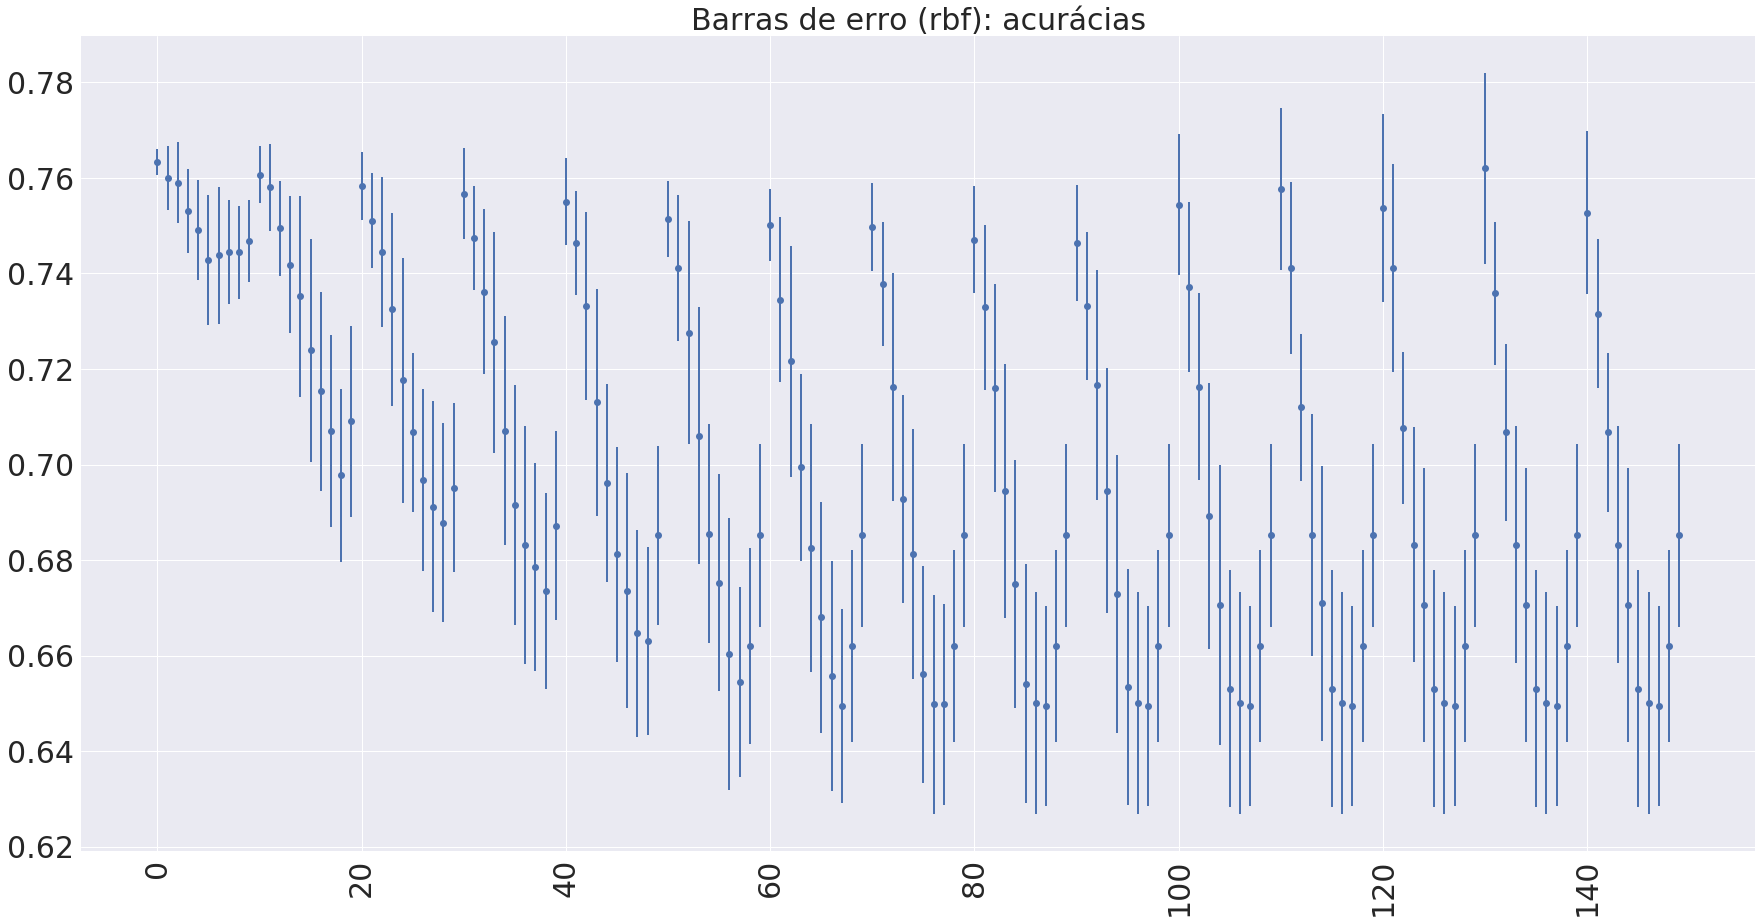

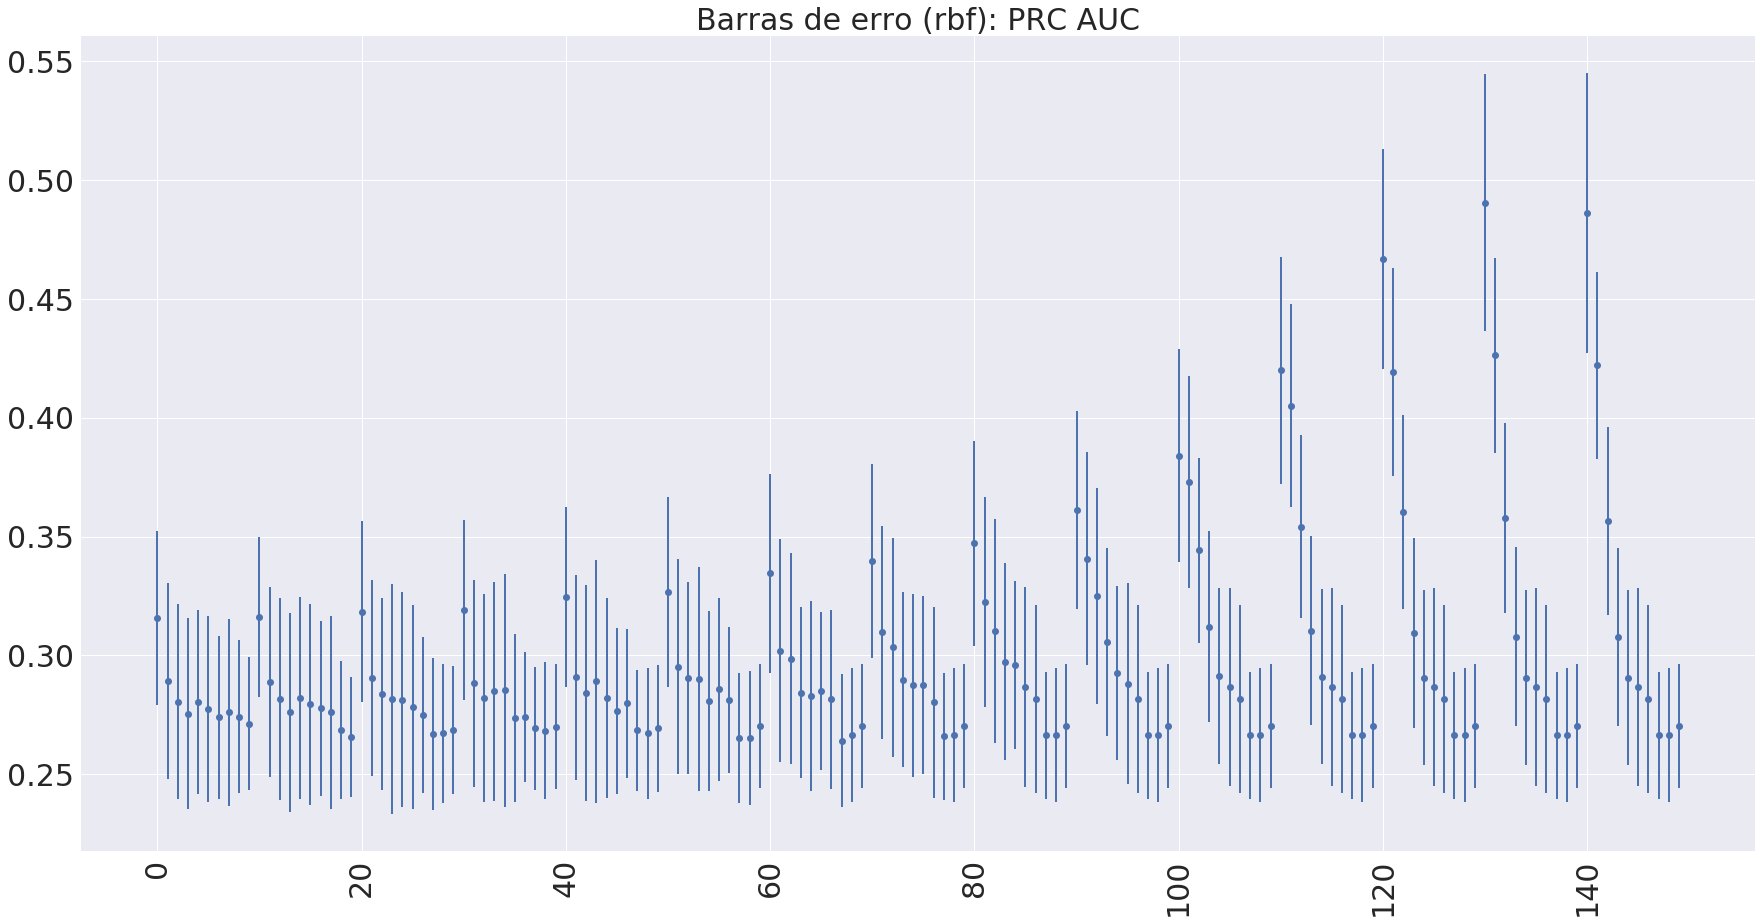

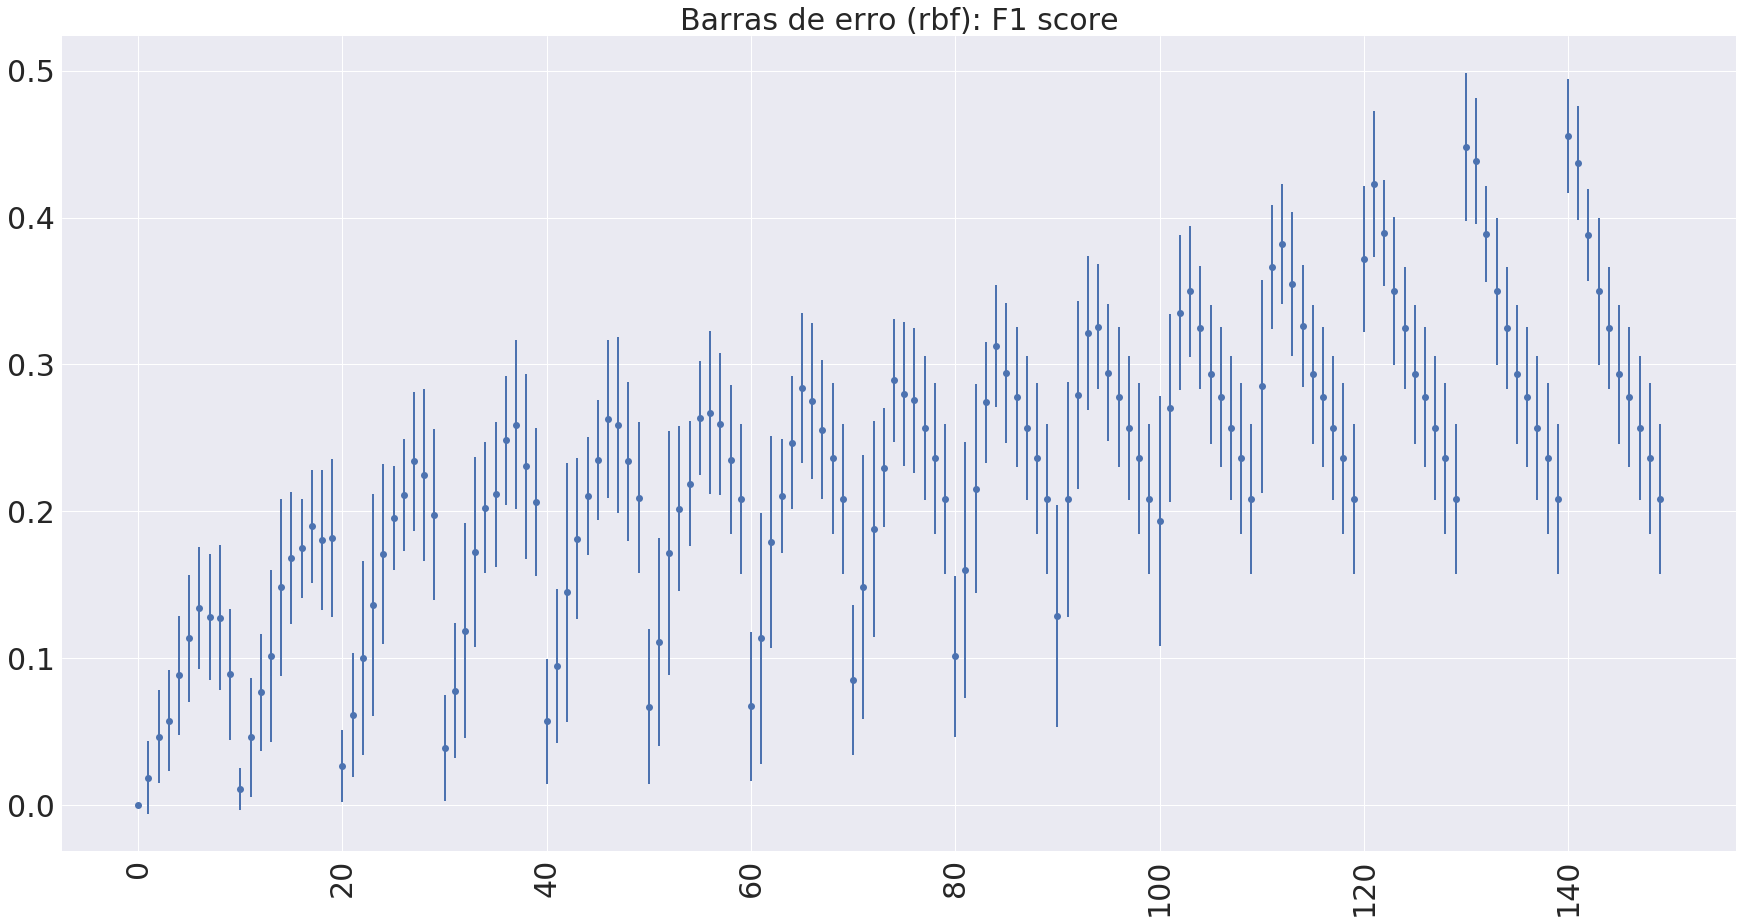

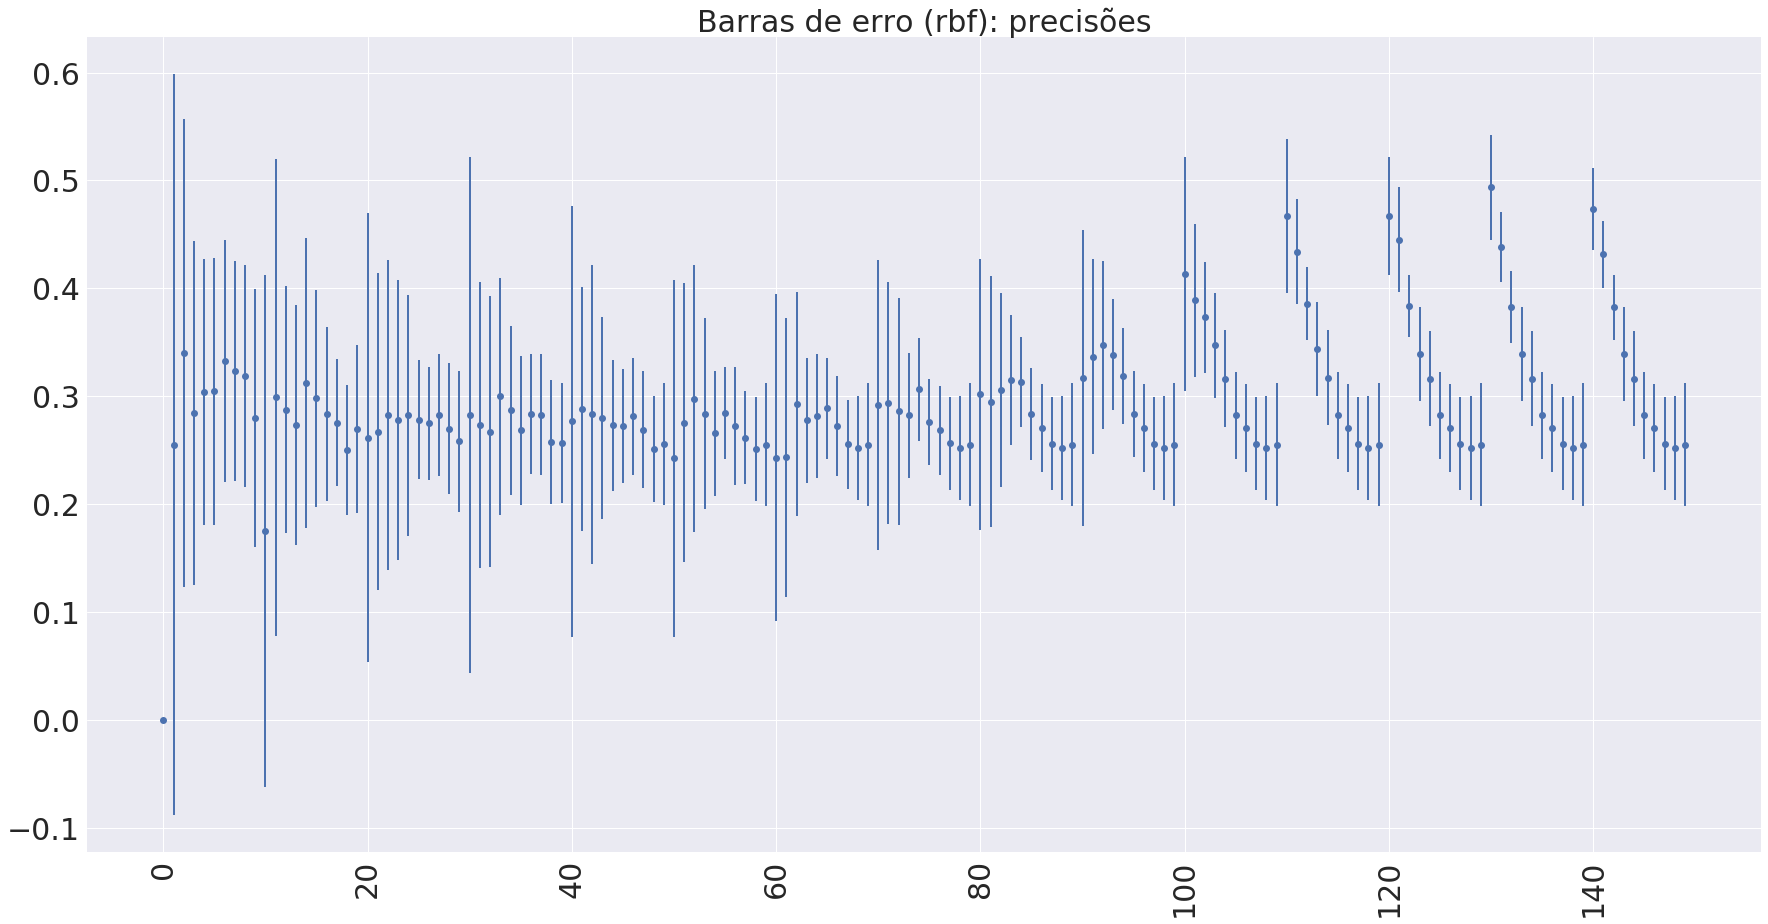

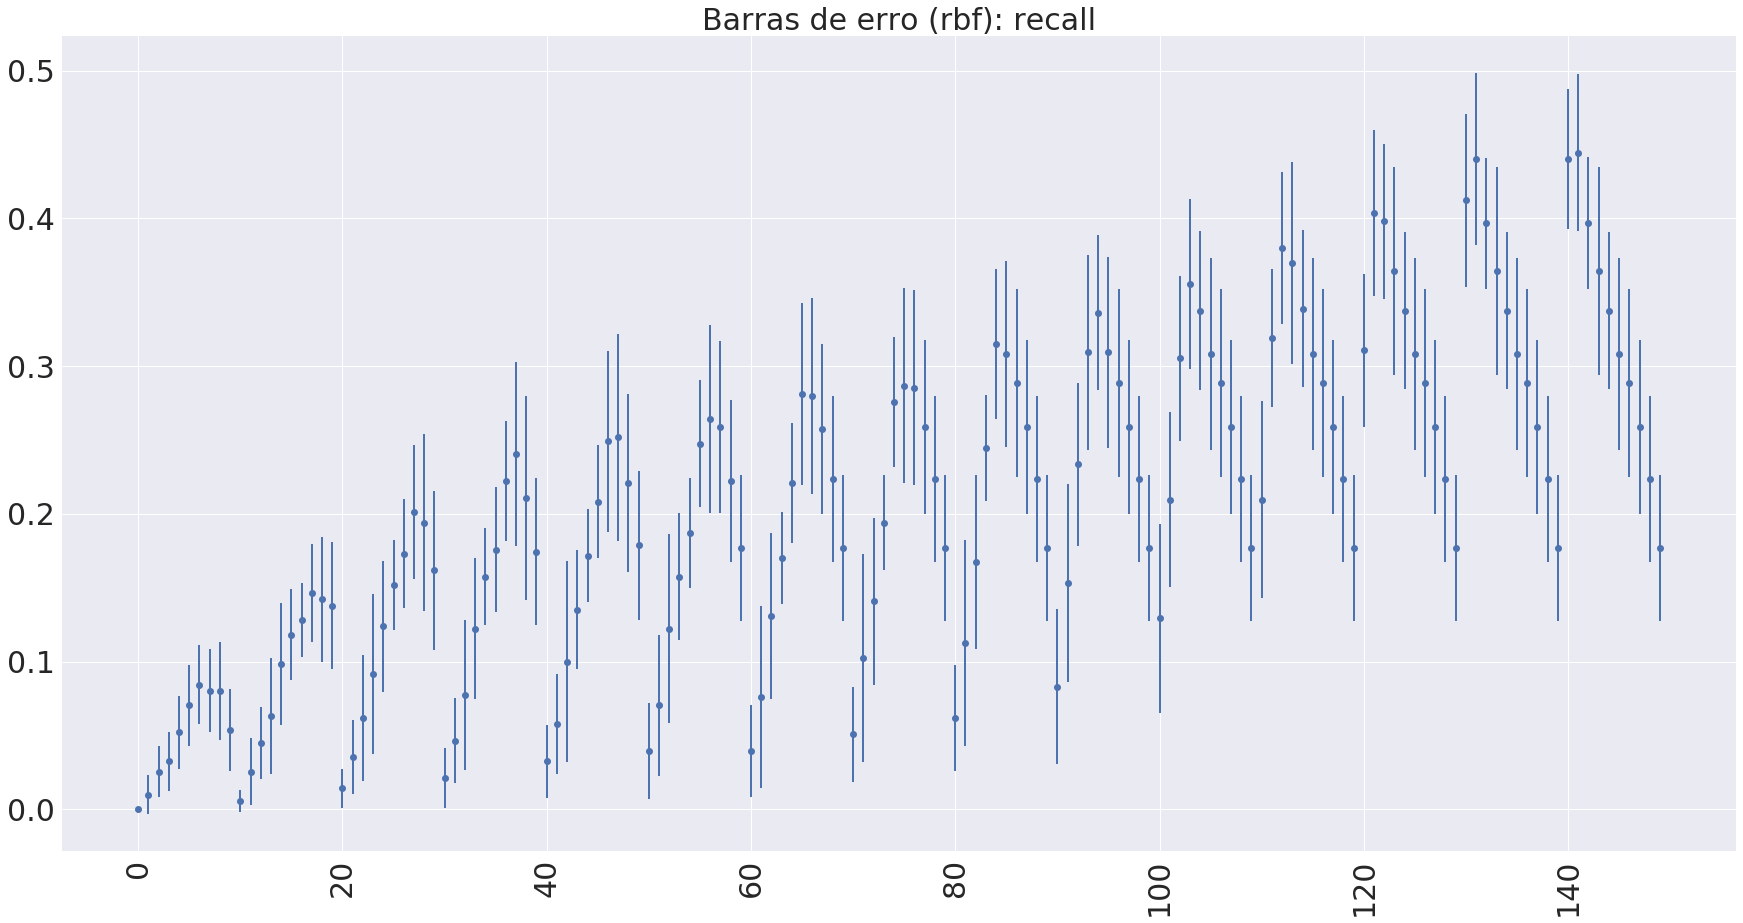

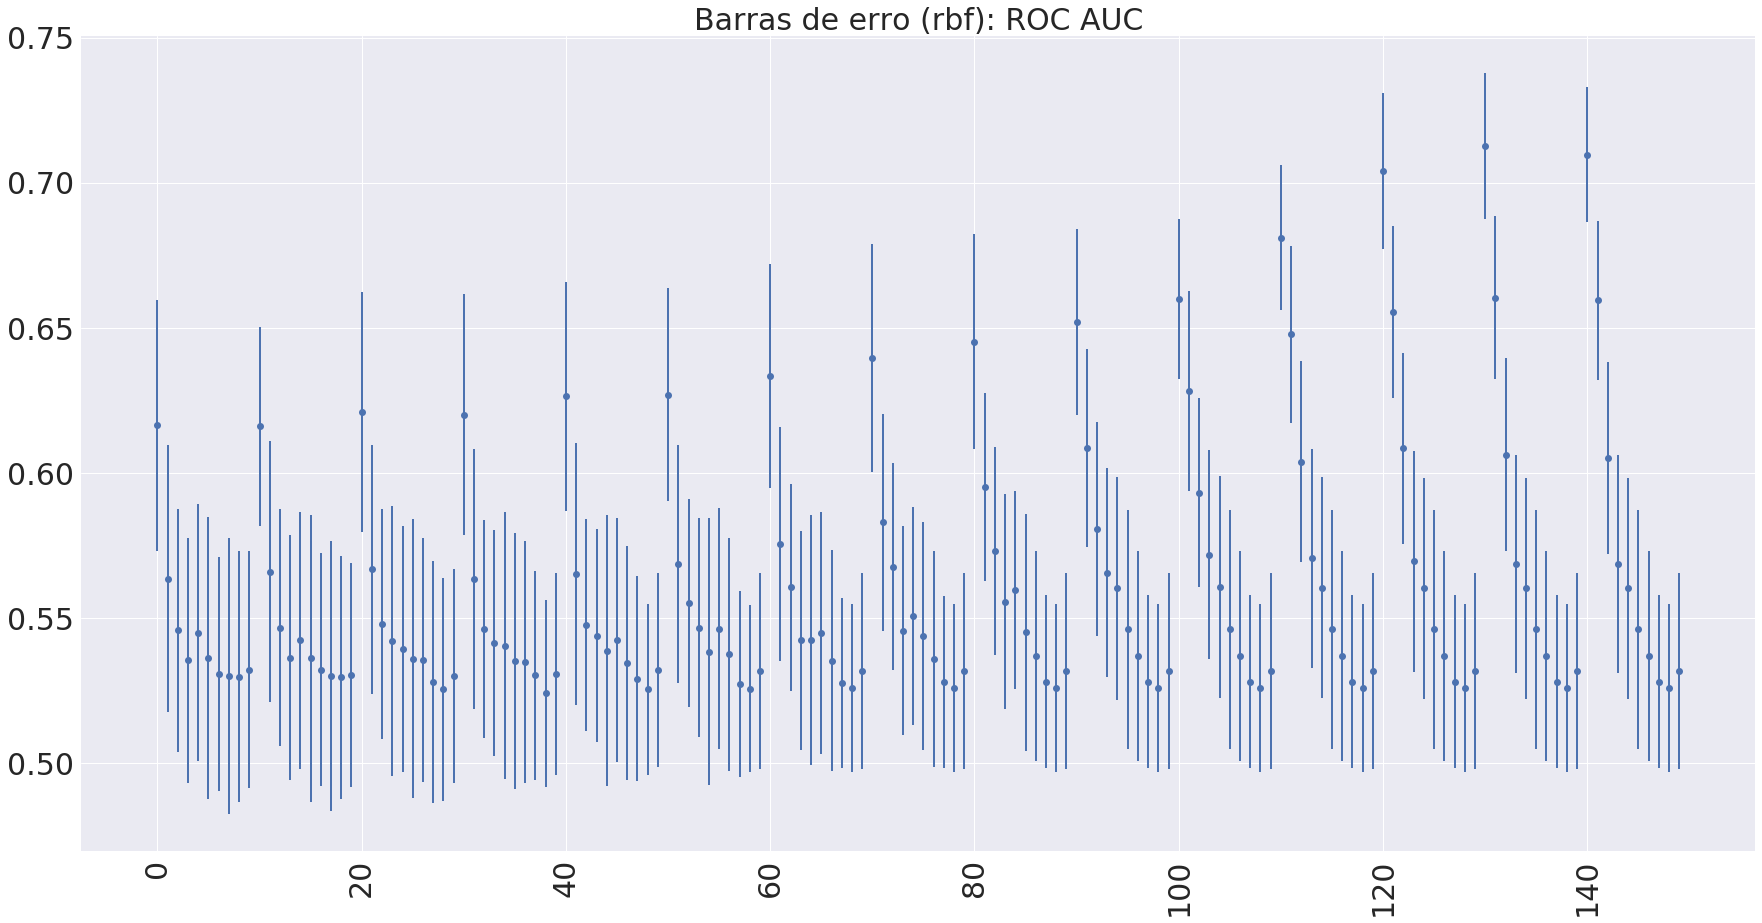

In [32]:
path_arquivos = 'Classificadores/SVM/'

clf_rbf_desbalanceado = joblib.load(path_arquivos+'svm-rbf-abordagem-1-desbalanceado-dataset-'+str(int(fracao_dataset*100))+'pct.pkl')

results = pd.DataFrame(clf_rbf_desbalanceado.cv_results_)
results.sort_values(by=['param_C', 'param_gamma'], axis=0, inplace=True)

results_test = results.loc[:, 'split0_test_accuracy':'split9_train_roc_auc']
results_train = results_test.filter(regex=(".*train.*"))
results_test.drop(columns=results_train.columns,inplace=True)

lista_metricas = [('accuracy', 'acurácias'), ('average_precision', 'PRC AUC'), ('f1', 'F1 score'), ('precision', 'precisões'), ('recall', 'recall'), ('roc_auc', 'ROC AUC')]

for metrica in lista_metricas:

    results_test_filtered = results_test.filter(regex='.*_test_'+str(metrica[0])).transpose()

    fig = plt.figure(figsize=(30,15))

    plt.errorbar(results_test_filtered.columns, results_test_filtered.mean(), yerr=results_test_filtered.std(), fmt='o', lw=2)
    plt.title('Barras de erro (rbf): ' + metrica[1], fontsize=30)
    plt.xticks(fontsize=30, rotation=90)
    plt.yticks(fontsize=30)
    plt.show()

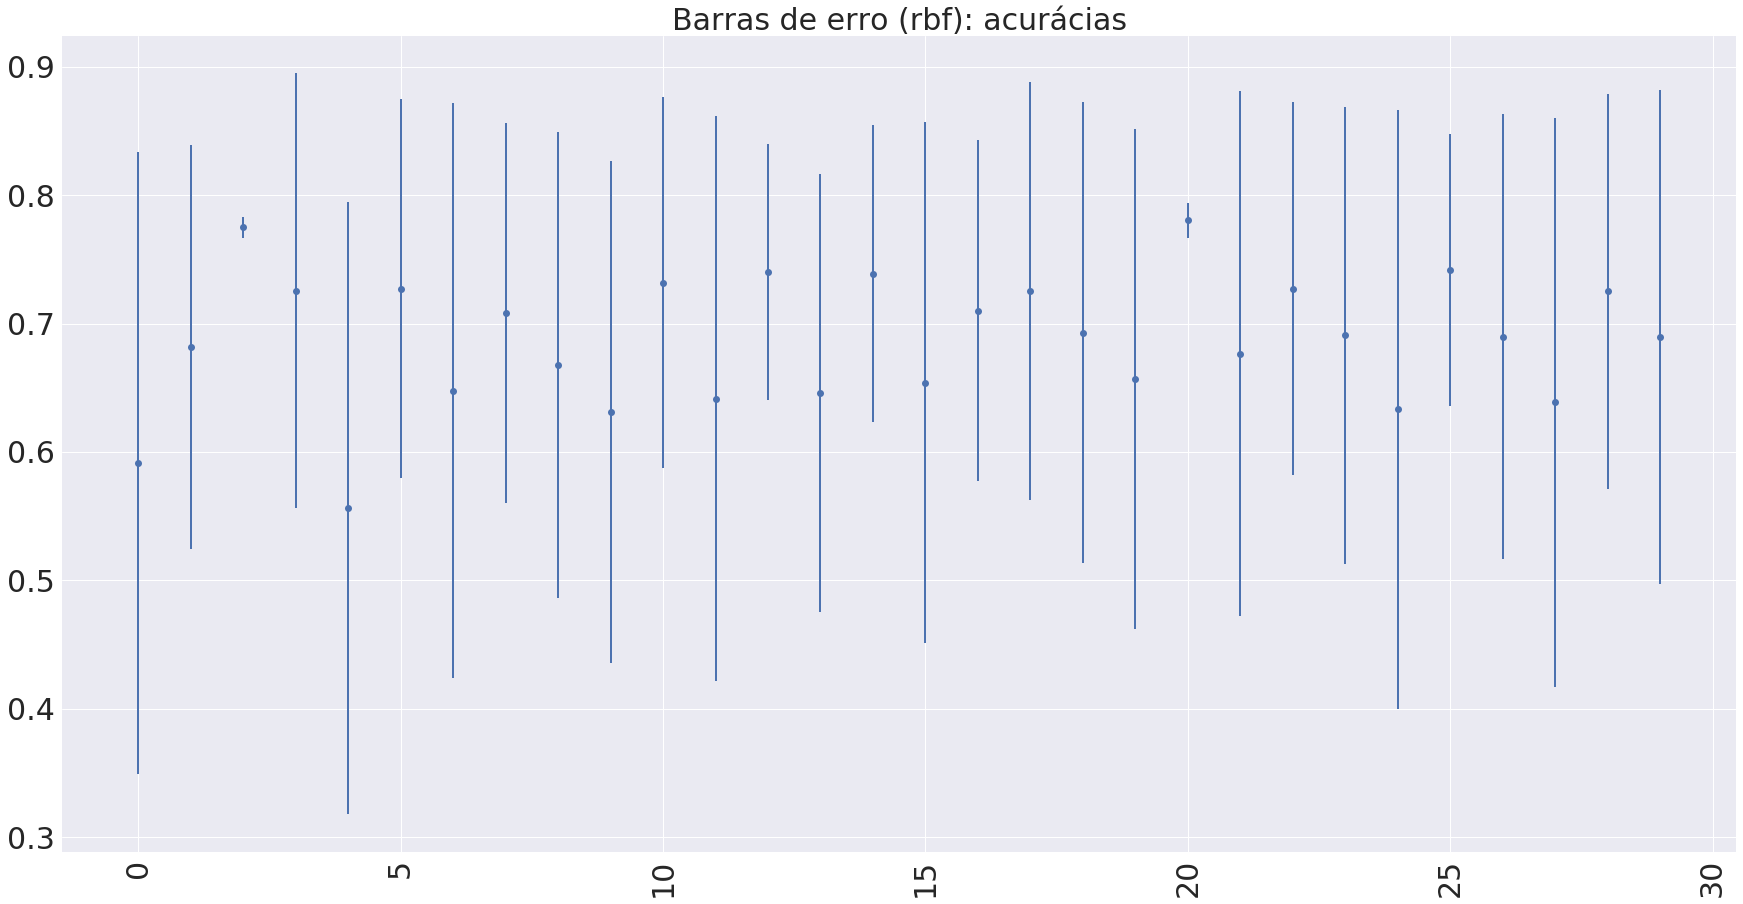

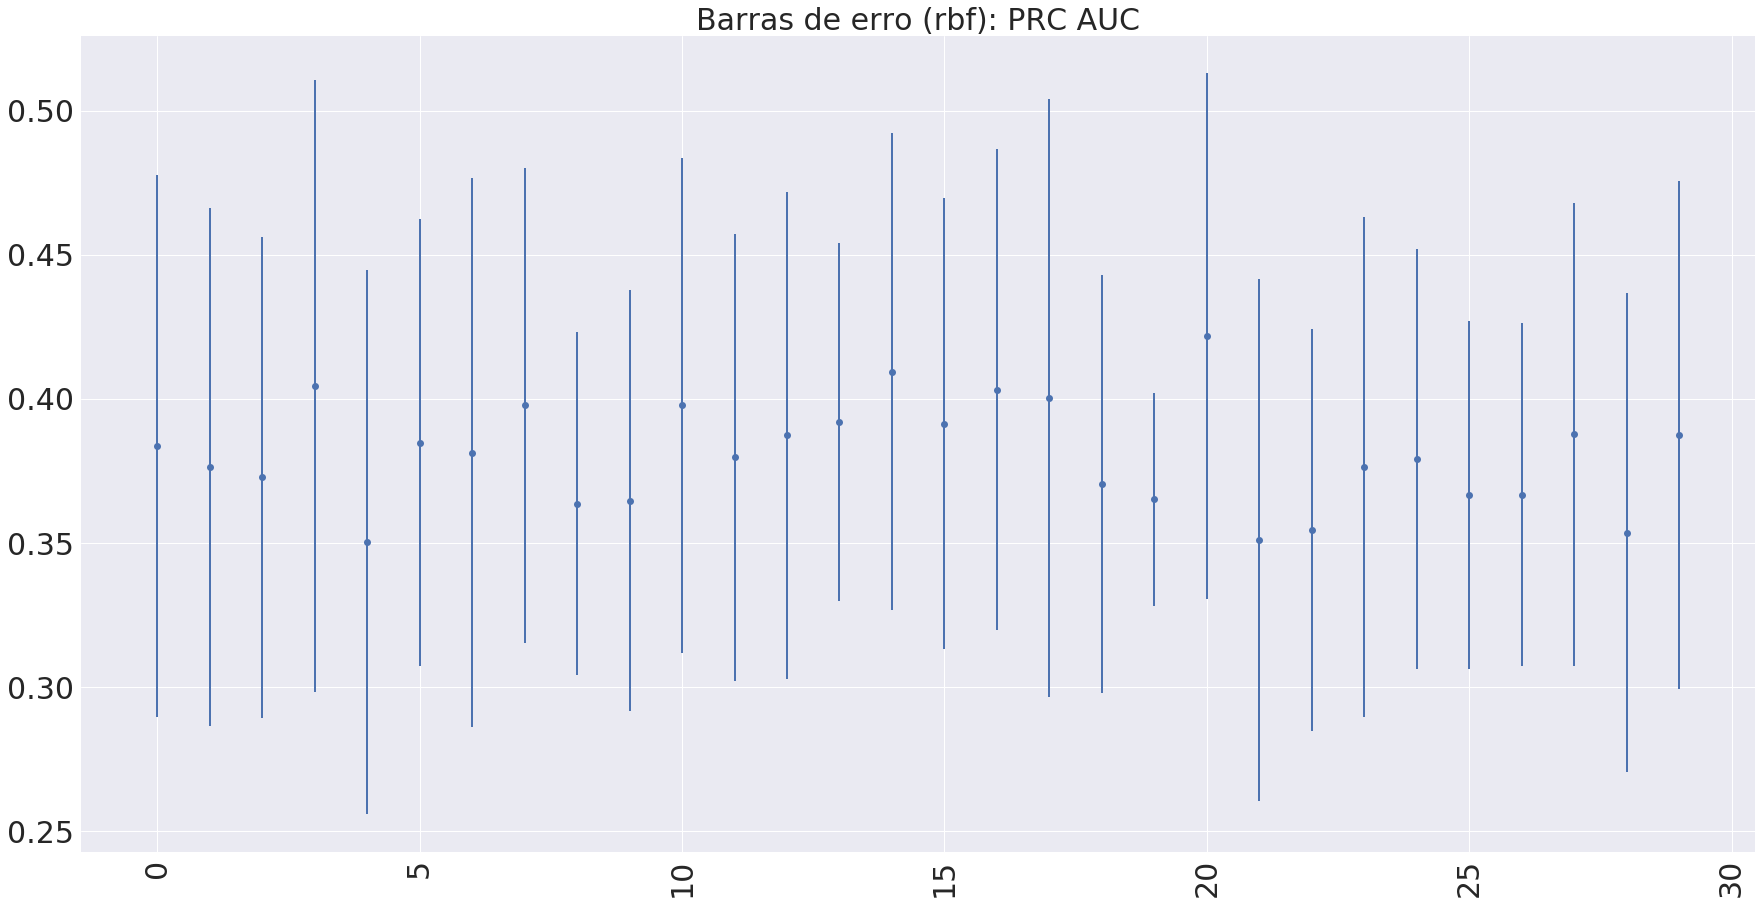

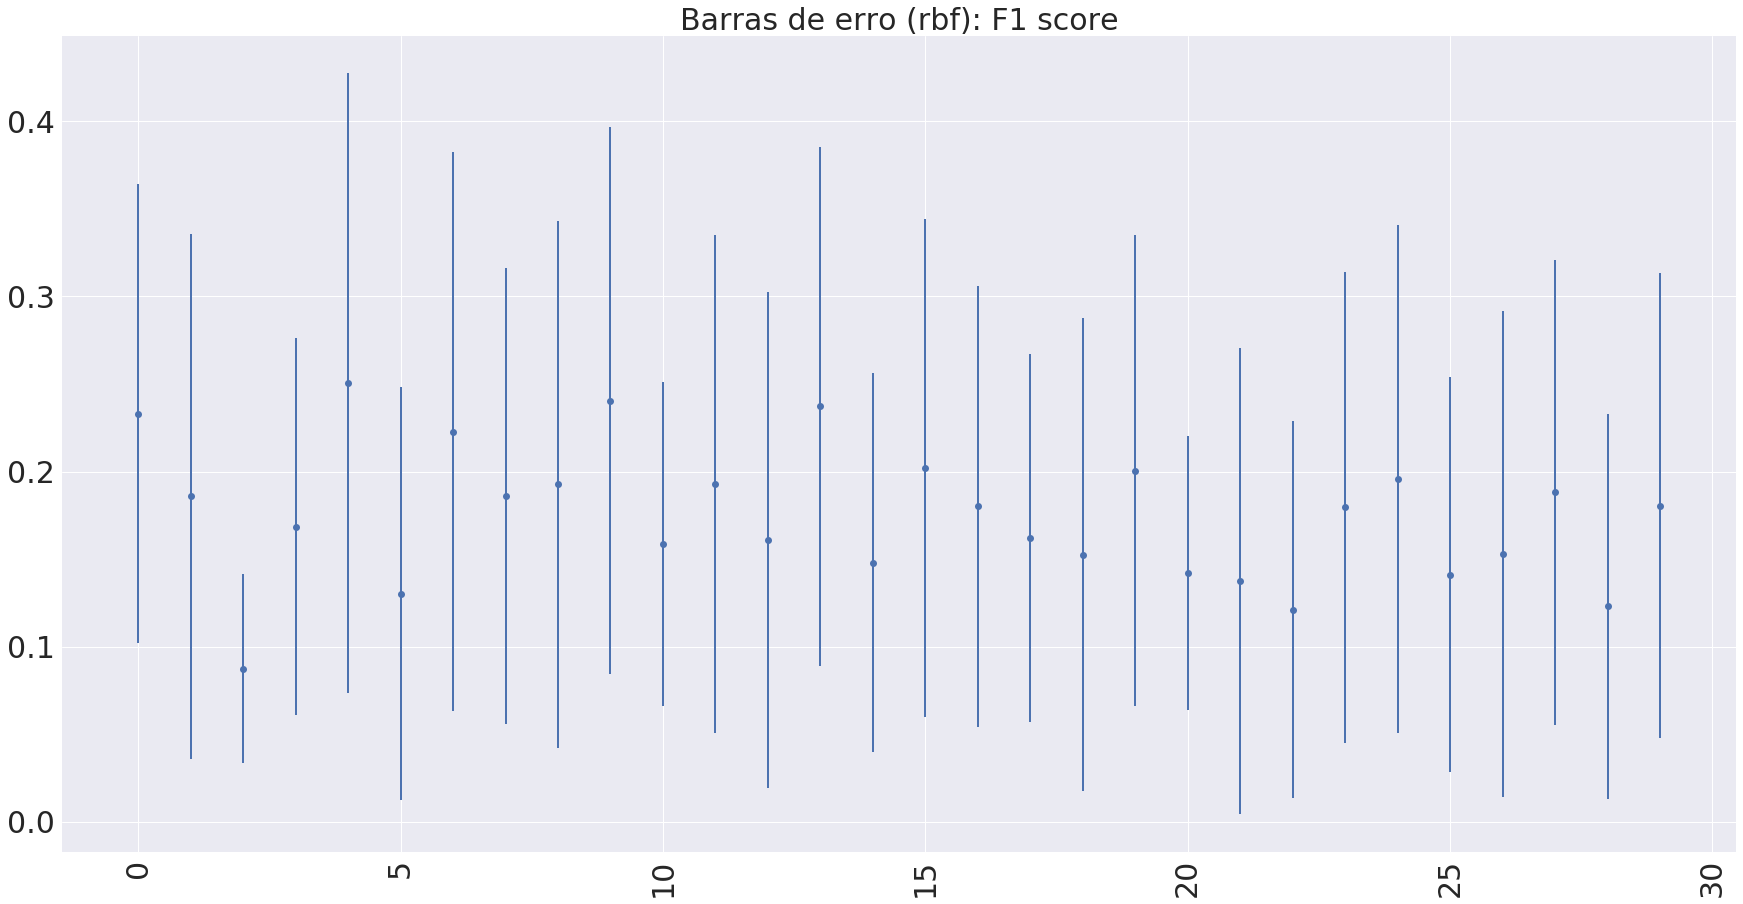

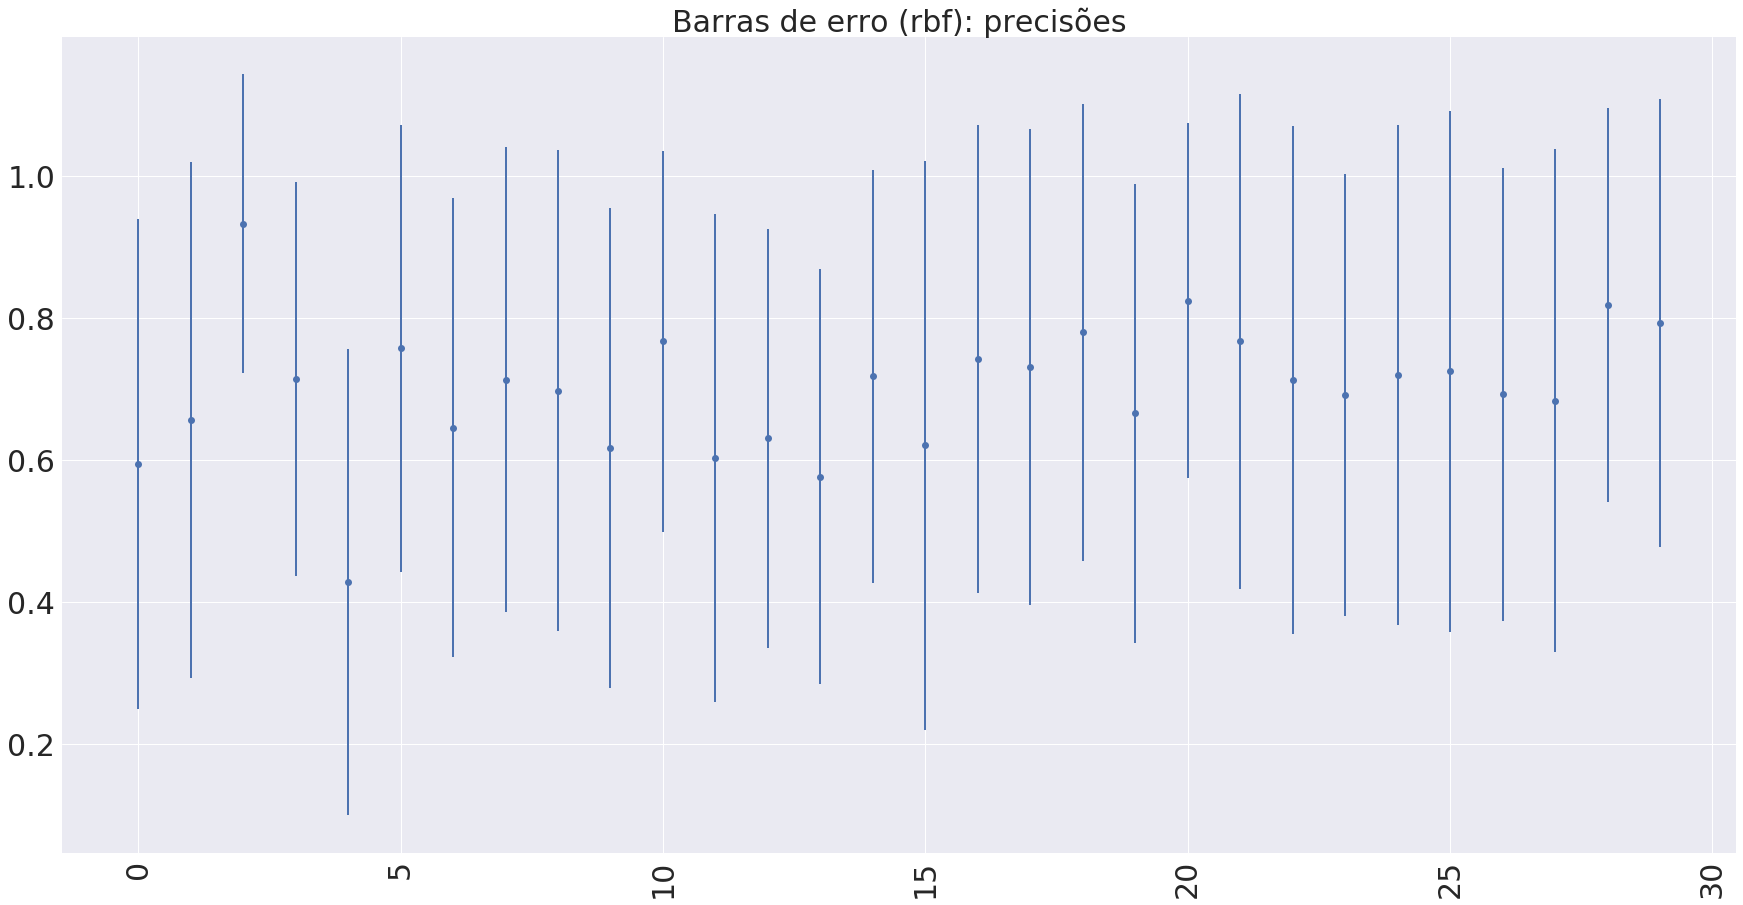

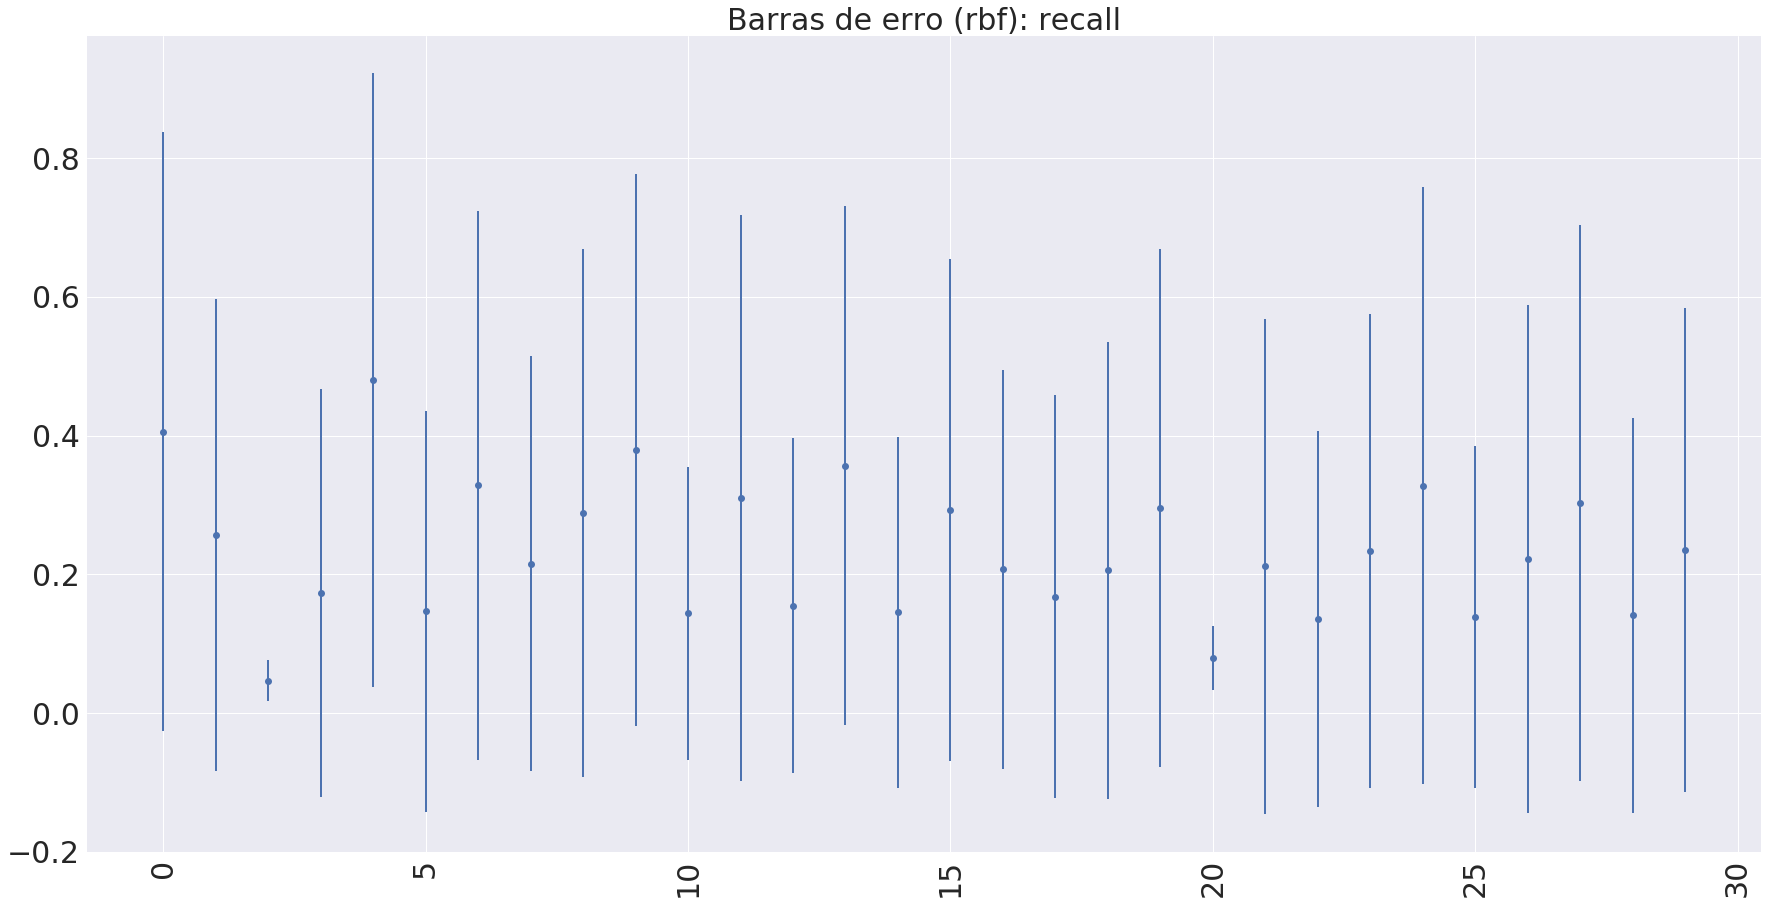

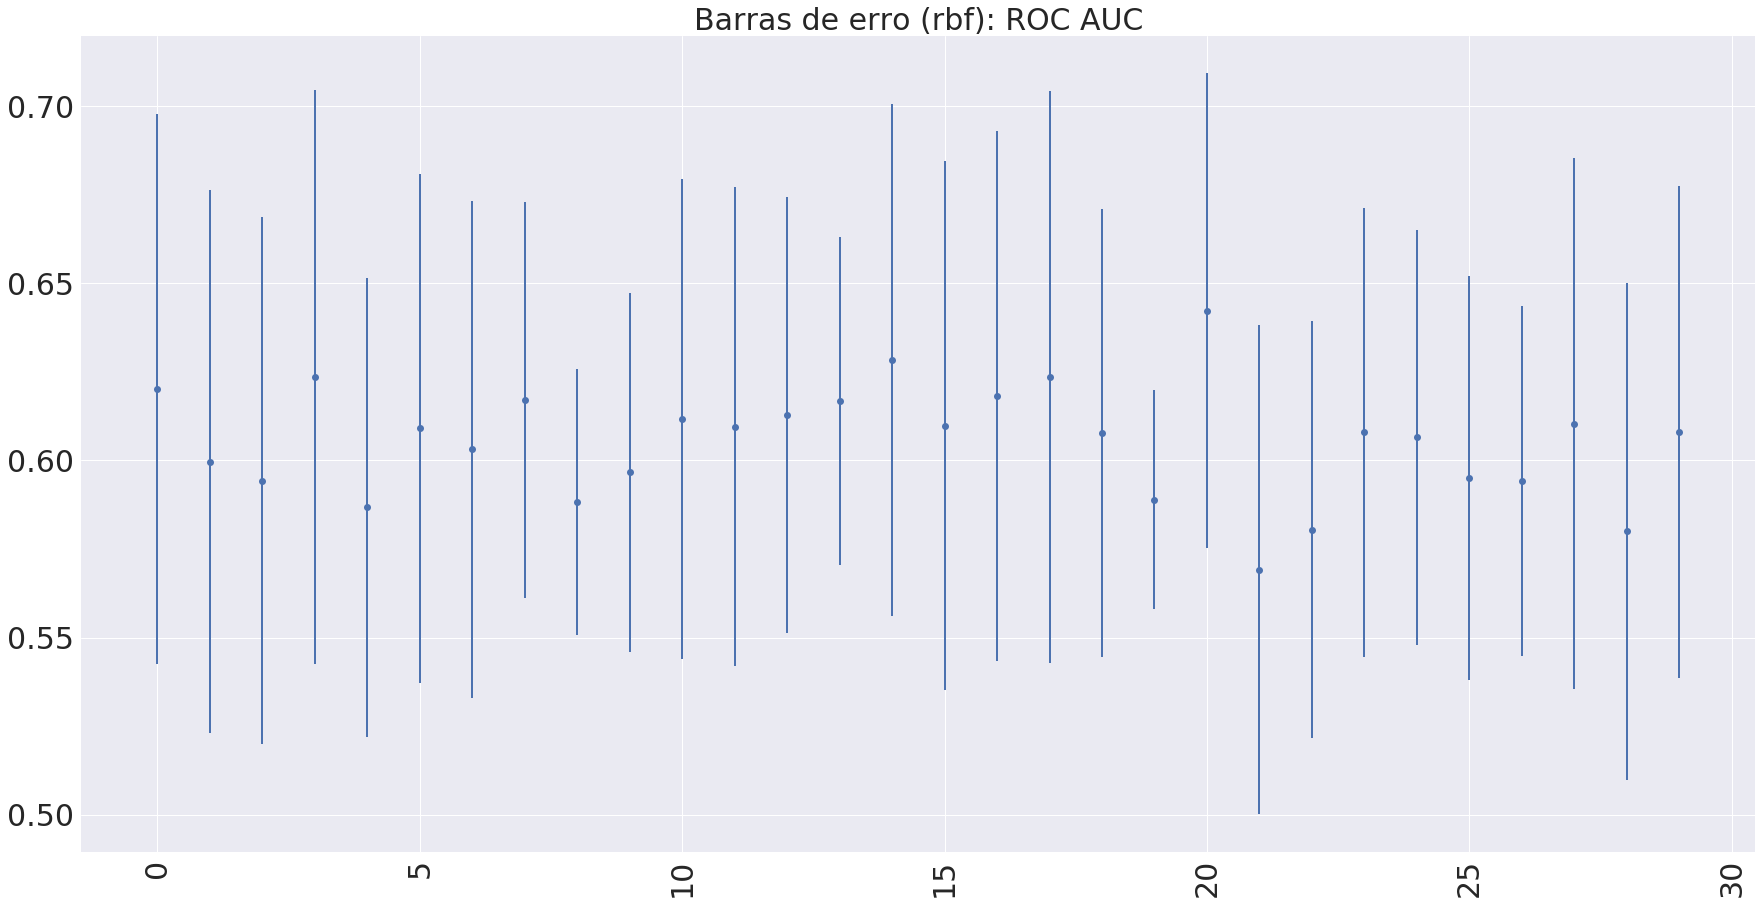

In [39]:
path_arquivos = 'Classificadores/SVM/'

clf_linear_desbalanceado = joblib.load(path_arquivos+'svm-linear-abordagem-1-desbalanceado-dataset-'+str(int(fracao_dataset*100))+'pct.pkl')

results = pd.DataFrame(clf_linear_desbalanceado.cv_results_)
results.sort_values(by=['param_C', 'param_loss'], axis=0, inplace=True)

results_test = results.loc[:, 'split0_test_accuracy':'split9_train_roc_auc']
results_train = results_test.filter(regex=(".*train.*"))
results_test.drop(columns=results_train.columns,inplace=True)

lista_metricas = [('accuracy', 'acurácias'), ('average_precision', 'PRC AUC'), ('f1', 'F1 score'), ('precision', 'precisões'), ('recall', 'recall'), ('roc_auc', 'ROC AUC')]

for metrica in lista_metricas:

    results_test_filtered = results_test.filter(regex='.*_test_'+str(metrica[0])).transpose()

    fig = plt.figure(figsize=(30,15))

    plt.errorbar(results_test_filtered.columns, results_test_filtered.mean(), yerr=results_test_filtered.std(), fmt='o', lw=2)
    plt.title('Barras de erro (rbf): ' + metrica[1], fontsize=30)
    plt.xticks(fontsize=30, rotation=90)
    plt.yticks(fontsize=30)
    plt.show()

In [ ]:
# Descomentar somente se for necessário retreinar a árvore

# Abordagem 2: Imputar os valores faltantes e manter outliers

clf_desbalanceado.fit(pd.get_dummies(train_data_2), train_target_2)
clf_balanceado.fit(pd.get_dummies(train_data_2), train_target_2)


# Salvando os resultados da validação cruzada

path_arquivos = 'Classificadores/SVM/'

joblib.dump(clf_desbalanceado, path_arquivos+'svm-abordagem-2-desbalanceado-dataset-'+str(int(fracao_dataset*100))+'pct.pkl')
joblib.dump(clf_balanceado, path_arquivos+'svm-abordagem-2-balanceado-dataset-'+str(int(fracao_dataset*100))+'pct.pkl')

In [ ]:
# Descomentar somente se for necessário retreinar a árvore

# Abordagem 3: Imputar os valores faltantes e retirar outliers

clf_desbalanceado.fit(pd.get_dummies(train_data_3), train_target_3)
clf_balanceado.fit(pd.get_dummies(train_data_3), train_target_3)


# Salvando os resultados da validação cruzada

path_arquivos = 'Classificadores/SVM/'

joblib.dump(clf_desbalanceado, path_arquivos+'svm-abordagem-3-desbalanceado-dataset-'+str(int(fracao_dataset*100))+'pct.pkl')
joblib.dump(clf_balanceado, path_arquivos+'svm-abordagem-3-balanceado-dataset-'+str(int(fracao_dataset*100))+'pct.pkl')

In [ ]:
# Descomentar somente se for necessário retreinar a árvore

# Abordagem 4: Retirar os valores faltantes e retirar outliers

clf_desbalanceado.fit(pd.get_dummies(train_data_4), train_target_4)
clf_balanceado.fit(pd.get_dummies(train_data_4), train_target_4)


# Salvando os resultados da validação cruzada

path_arquivos = 'Classificadores/SVM/'

joblib.dump(clf_desbalanceado, path_arquivos+'svm-abordagem-4-desbalanceado-dataset-'+str(int(fracao_dataset*100))+'pct.pkl')
joblib.dump(clf_balanceado, path_arquivos+'svm-abordagem-4-balanceado-dataset-'+str(int(fracao_dataset*100))+'pct.pkl')